### 1->Build a Multiple Linear Regression model to predict Performance_Rating based on Age,
### Years_at_Company, Job_Satisfaction, Work_Life_Balance, and Num_Trainings. Report R2,
### MSE, and MAE.

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"D:\iiitnr\Assignment\assignment4\synthetic_employee_data.csv")

features = ['Age', 'Years_at_Company', 'Job_Satisfaction', 'Work_Life_Balance', 'Num_Trainings']
X = df[features]
y = df['Performance_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R²: 0.6225481682459892
MSE: 0.21424284399644383
MAE: 0.3800388260279397


### 2-> Compare Linear Regression, Ridge Regression, and Lasso Regression models for
### predicting Performance_Rating. Use 5-fold cross-validation and report average R2 and RMSE.
### Which regularized model performs better?

In [6]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

print("Model Comparison (5-fold CV):\n")
for name, model in models.items():
    r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    rmse = np.mean(np.sqrt(-cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')))
    print(f"{name}: R² = {r2:.4f}, RMSE = {rmse:.4f}")


Model Comparison (5-fold CV):

Linear Regression: R² = 0.6076, RMSE = 0.4786
Ridge Regression: R² = 0.6076, RMSE = 0.4786
Lasso Regression: R² = 0.5855, RMSE = 0.4921


### 3->Train a Random Forest Regressor to predict Performance_Rating and visualize feature
### importances. Which features have the highest contribution to the rating?

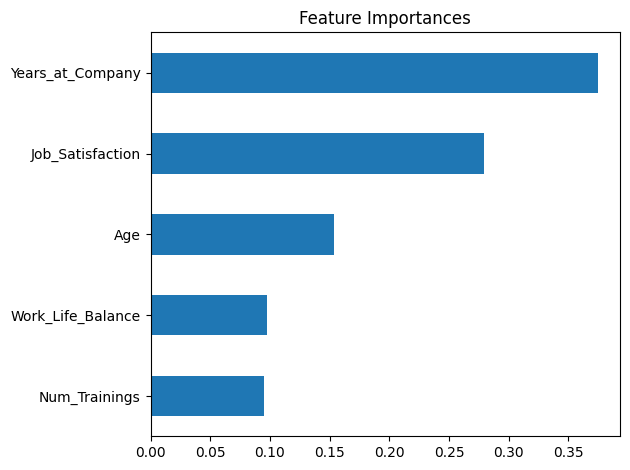

In [7]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Plot feature importances
importances = pd.Series(rf.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.tight_layout()
plt.show()


### 4->Perform Polynomial Regression (degree 2 or 3) using Years_at_Company and Job_Satisfaction to predict Performance_Rating. Compare its performance with Linear Regression using adjusted R2. Discuss overfitting if any.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['Years_at_Company', 'Job_Satisfaction']])
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
n, k = X_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print(f"Polynomial Regression Adjusted R²: {adj_r2:.4f}")


Polynomial Regression Adjusted R²: 0.5414


### 5->Use Recursive Feature Elimination (RFE) with a Linear Regression model to select the top  features affecting Performance_Rating. Retrain the model with these and report change in performance metrics.

In [9]:
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=4)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())

# Retrain using selected features
X_sel = df[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, random_state=42)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


Selected Features: ['Years_at_Company', 'Job_Satisfaction', 'Work_Life_Balance', 'Num_Trainings']
R²: 0.6209605438181993
MSE: 0.21514398460298775
MAE: 0.38130922166087367
